In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
clinical_data_file = "raw_data/clinicaltrial_data.csv"
mousedrug_data_file ="raw_data/mouse_drug_data.csv"

In [3]:
clinical_data_df = pd.read_csv(clinical_data_file)

In [4]:
mousedata_df = pd.read_csv(mousedrug_data_file)

In [5]:
combined_data_df = pd.merge(clinical_data_df, mousedata_df, on ="Mouse ID", how = "outer" )
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
druggroup = combined_data_df.groupby(["Drug","Timepoint"])
se_t =druggroup['Tumor Volume (mm3)'].sem()
tumorgrowth_pertime_df = pd.DataFrame(druggroup["Tumor Volume (mm3)"].mean())
se_t_df = pd.DataFrame(se_t)
se_t_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
se_tplot = se_t_df.pivot_table(se_t_df, index=["Timepoint"], columns = "Drug")["Tumor Volume (mm3)"]
se_tplot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [8]:
tumorGrowth_timepoint = tumorgrowth_pertime_df.pivot_table(tumorgrowth_pertime_df,  index=["Timepoint"], columns = "Drug") ["Tumor Volume (mm3)"]
tumorGrowth_timepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
tumorGrowth_timepoint = tumorGrowth_timepoint.reset_index("Timepoint")


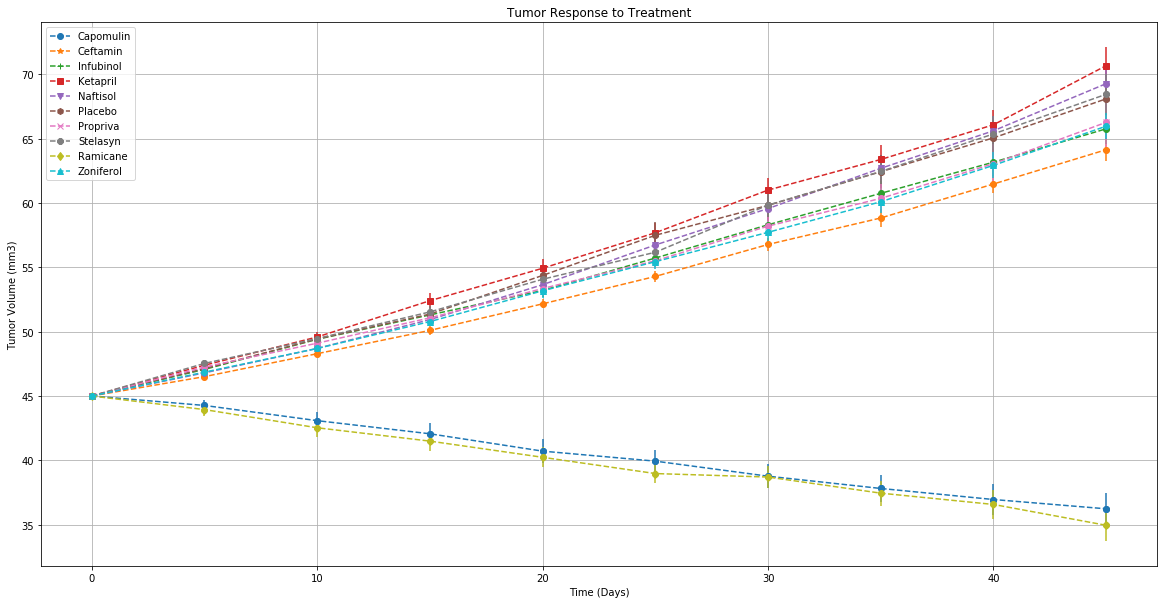

In [10]:
#Create a scatter plot between the tumor growth as the treatment progressed
x = tumorGrowth_timepoint ['Timepoint']
y1 = tumorGrowth_timepoint ['Capomulin']
y2 = tumorGrowth_timepoint ['Ceftamin']
y3 = tumorGrowth_timepoint ['Infubinol']
y4 = tumorGrowth_timepoint ['Ketapril']
y5 = tumorGrowth_timepoint ['Naftisol']
y6 = tumorGrowth_timepoint ['Placebo']
y7 = tumorGrowth_timepoint ['Propriva']
y8 = tumorGrowth_timepoint ['Stelasyn']
y9 = tumorGrowth_timepoint ['Ramicane']
y10 = tumorGrowth_timepoint ['Zoniferol']


y1err = se_tplot['Capomulin']
y2err = se_tplot['Ceftamin']
y3err = se_tplot['Infubinol']
y4err = se_tplot['Ketapril']
y5err = se_tplot['Naftisol']
y6err = se_tplot['Placebo']
y7err = se_tplot['Propriva']
y8err = se_tplot['Stelasyn']
y9err = se_tplot['Ramicane']
y10err = se_tplot['Zoniferol']

plt.figure(figsize = (20,10))
line1, = plt.plot(x, y1, 'o--', label = 'Capomulin')
line2, = plt.plot(x, y2, '*--', label = 'Ceftamin')
line3, = plt.plot(x, y3, '+--', label = 'Infubinol')
line4, = plt.plot(x, y4, 's--', label = 'Ketapril')
line5, = plt.plot(x, y5, 'v--', label = 'Naftisol')
line6, = plt.plot(x, y6, 'h--', label = 'Placebo')
line7, = plt.plot(x, y7, 'x--', label = 'Propriva')
line8, = plt.plot(x, y8, '8--', label = 'Stelasyn')
line9, = plt.plot(x, y9, 'd--', label = 'Ramicane')
line10, = plt.plot(x, y10, '^--', label = 'Zoniferol')
                  
errline1 = plt.errorbar(x,y1, y1err,fmt = 'o')
errline2  = plt.errorbar(x,y2,y2err, fmt = 'o')
errline3 = plt.errorbar(x,y3,y3err,fmt ='o' )
errline4 = plt.errorbar(x,y4,y4err,fmt = 'o' )
errline5 = plt.errorbar(x,y5, y5err,fmt = 'o' )
errline6 = plt.errorbar(x,y6, y6err,fmt = 'o' )
errline7 = plt.errorbar(x,y7, y7err, fmt = 'o' )
errline8 = plt.errorbar(x,y8, y8err, fmt = 'o')
errline9 = plt.errorbar(x,y9, y9err,fmt = 'o' )
errline10 = plt.errorbar(x,y10, y10err, fmt = 'o')

plt.legend(handles=[line1, line2, line3, line4, line5, line6, line7, line8, line9, line10], loc = 'best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

In [11]:
metastatic_data = combined_data_df.groupby(["Drug","Timepoint"])
se_m = metastatic_data['Metastatic Sites'].sem()
metatasticResp_pertime_df = pd.DataFrame(metastatic_data["Metastatic Sites"].mean())
se_m_df = pd.DataFrame(se_m)
se_m_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
se_mplot = se_m_df.pivot_table(se_m_df, index=["Timepoint"], columns = "Drug")["Metastatic Sites"]
se_mplot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [13]:
metastiticResponse_treatment = metatasticResp_pertime_df.pivot_table(metatasticResp_pertime_df,  index=["Timepoint"], columns = "Drug") ["Metastatic Sites"]
metastiticResponse_treatment

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [14]:
metastiticResponse_treatment = metastiticResponse_treatment.reset_index("Timepoint")

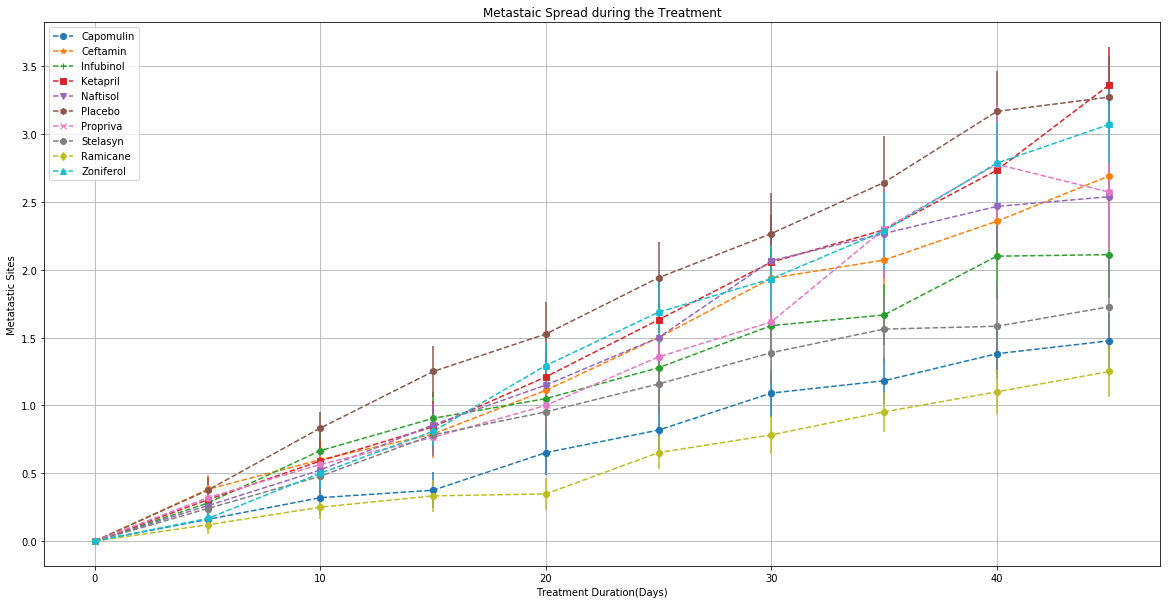

In [15]:
#Create a scatter plot between the tumor growth as the treatment progressed
x = metastiticResponse_treatment ['Timepoint']
y1 = metastiticResponse_treatment ['Capomulin']
y2 = metastiticResponse_treatment ['Ceftamin']
y3 = metastiticResponse_treatment ['Infubinol']
y4 = metastiticResponse_treatment ['Ketapril']
y5 = metastiticResponse_treatment ['Naftisol']
y6 = metastiticResponse_treatment ['Placebo']
y7 = metastiticResponse_treatment ['Propriva']
y8 = metastiticResponse_treatment ['Stelasyn']
y9 = metastiticResponse_treatment ['Ramicane']
y10 = metastiticResponse_treatment ['Zoniferol']

y1err = se_mplot['Capomulin']
y2err = se_mplot['Ceftamin']
y3err = se_mplot['Infubinol']
y4err = se_mplot['Ketapril']
y5err = se_mplot['Naftisol']
y6err = se_mplot['Placebo']
y7err = se_mplot['Propriva']
y8err = se_mplot['Stelasyn']
y9err = se_mplot['Ramicane']
y10err = se_mplot['Zoniferol']



plt.figure(figsize = (20,10))

line1, = plt.plot(x, y1, 'o--', label = 'Capomulin')
line2, = plt.plot(x, y2, '*--', label = 'Ceftamin')
line3, = plt.plot(x, y3, '+--', label = 'Infubinol')
line4, = plt.plot(x, y4, 's--', label = 'Ketapril')
line5, = plt.plot(x, y5, 'v--', label = 'Naftisol')
line6, = plt.plot(x, y6, 'h--', label = 'Placebo')
line7, = plt.plot(x, y7, 'x--', label = 'Propriva')
line8, = plt.plot(x, y8, '8--', label = 'Stelasyn')
line9, = plt.plot(x, y9, 'd--', label = 'Ramicane')
line10, = plt.plot(x, y10, '^--', label = 'Zoniferol')

plt.legend(handles=[line1, line2, line3, line4, line5, line6, line7, line8, line9, line10], loc = 'best')
plt.title('Metastaic Spread during the Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Metatastic Sites')
plt.grid()

errline1 = plt.errorbar(x,y1, y1err,fmt = 'o')
errline2  = plt.errorbar(x,y2,y2err, fmt = 'o')
errline3 = plt.errorbar(x,y3,y3err,fmt ='o' )
errline4 = plt.errorbar(x,y4,y4err,fmt = 'o' )
errline5 = plt.errorbar(x,y5, y5err,fmt = 'o' )
errline6 = plt.errorbar(x,y6, y6err,fmt = 'o' )
errline7 = plt.errorbar(x,y7, y7err, fmt = 'o' )
errline8 = plt.errorbar(x,y8, y8err, fmt = 'o')
errline9 = plt.errorbar(x,y9, y9err,fmt = 'o' )
errline10 = plt.errorbar(x,y10, y10err, fmt = 'o')
plt.show()

In [16]:
micesurvival_group = combined_data_df.groupby(["Drug","Timepoint"])
miceSurvival_df = pd.DataFrame(micesurvival_group["Mouse ID"].count())
miceSurvival_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
miceSurvival_treatment = miceSurvival_df.pivot_table(miceSurvival_df,  index=["Timepoint"], columns = "Drug") ["Mouse ID"]
miceSurvival_treatment

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
miceSurvival_treatment = miceSurvival_treatment.reset_index("Timepoint")

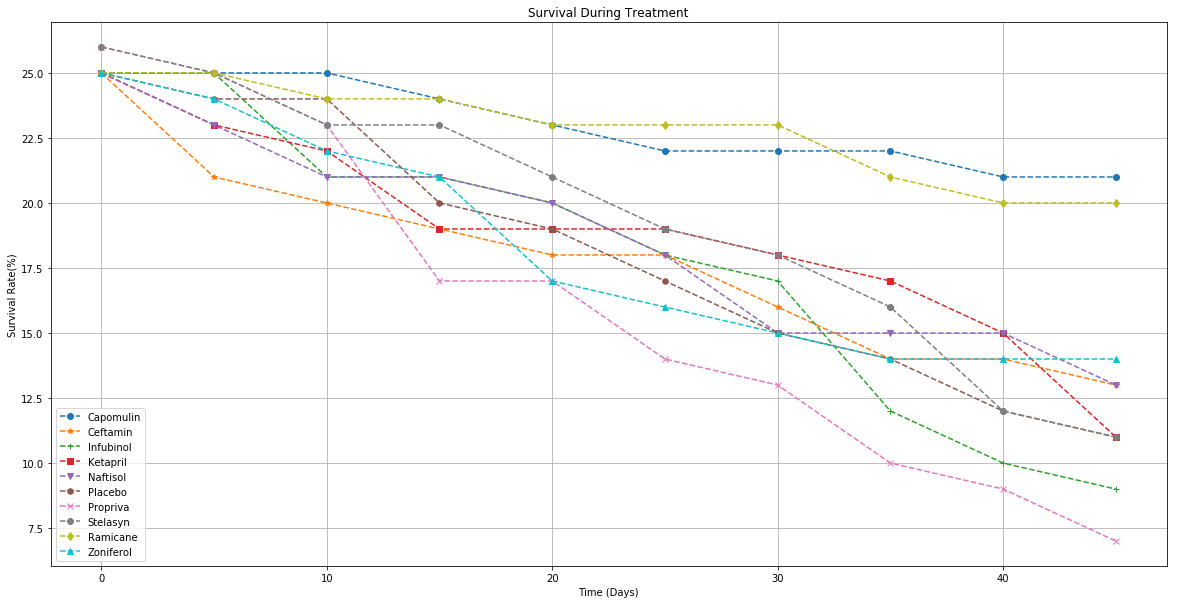

In [19]:
x = miceSurvival_treatment['Timepoint']
y1 = miceSurvival_treatment ['Capomulin']
y2 = miceSurvival_treatment ['Ceftamin']
y3 = miceSurvival_treatment ['Infubinol']
y4 = miceSurvival_treatment ['Ketapril']
y5 = miceSurvival_treatment ['Naftisol']
y6 = miceSurvival_treatment ['Placebo']
y7 = miceSurvival_treatment ['Propriva']
y8 = miceSurvival_treatment ['Stelasyn']
y9 = miceSurvival_treatment ['Ramicane']
y10 =miceSurvival_treatment ['Zoniferol']

plt.figure(figsize = (20,10))
line1, = plt.plot(x, y1, 'o--', label = 'Capomulin')
line2, = plt.plot(x, y2, '*--', label = 'Ceftamin')
line3, = plt.plot(x, y3, '+--', label = 'Infubinol')
line4, = plt.plot(x, y4, 's--', label = 'Ketapril')
line5, = plt.plot(x, y5, 'v--', label = 'Naftisol')
line6, = plt.plot(x, y6, 'h--', label = 'Placebo')
line7, = plt.plot(x, y7, 'x--', label = 'Propriva')
line8, = plt.plot(x, y8, '8--', label = 'Stelasyn')
line9, = plt.plot(x, y9, 'd--', label = 'Ramicane')
line10, = plt.plot(x, y10, '^--', label = 'Zoniferol')

plt.legend(handles=[line1, line2, line3, line4, line5, line6, line7, line8, line9, line10], loc = 'best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.grid()
plt.show()

In [20]:
tumorGrowth_timepoint.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [21]:
drug_data = pd.merge(clinical_data_df, mousedata_df, on ="Mouse ID", how = "outer" )

In [32]:
drug_group = drug_data.groupby(["Drug", "Timepoint"])
finaltumor_vol = drug_group["Tumor Volume (mm3)"].last()
inittumor_vol = 45.000000
perct_volumechange = ((finaltumor_vol -inittumor_vol)/inittumor_vol)*100


In [33]:
perchanage_df = pd.DataFrame(perct_volumechange)

In [34]:
perchanage_df = perchanage_df.reset_index("Drug")

In [35]:
perchanage_df = perchanage_df.reset_index("Timepoint")


In [36]:
finalTumorper_df = perchanage_df.loc[perchanage_df["Timepoint"] ==45]
finalTumorper_df

,Timepoint,Drug,Tumor Volume (mm3)
9,45,Capomulin,-36.820080
19,45,Ceftamin,32.759779
29,45,Infubinol,35.375037
39,45,Ketapril,53.896674
49,45,Naftisol,54.585824
59,45,Placebo,53.428535
69,45,Propriva,55.928331
79,45,Ramicane,-19.167755
89,45,Stelasyn,66.941532
99,45,Zoniferol,43.500492


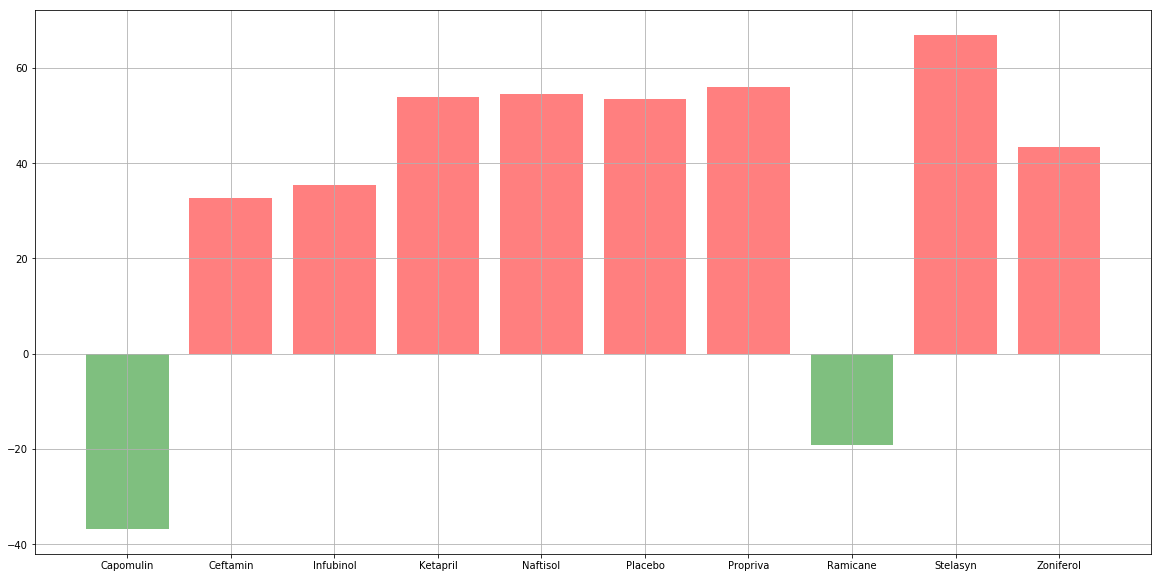

In [41]:
tumor_volume = finalTumorper_df["Tumor Volume (mm3)"]
x_axis = np.arange(len(tumor_volume))

plt.figure(figsize = (20,10))

colors = []
for value in tumor_volume:
    if value > 0:
        colors.append('r')
    else:
        colors.append("g")
p1 = plt.bar(x_axis, tumor_volume,color = colors,alpha = 0.5, align = "edge")     

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin", "Infubinol", 'Ketapril','Naftisol', 'Placebo','Propriva','Ramicane', 'Stelasyn','Zoniferol'])
plt.grid()
plt.show()